# Walmart's Weekly Sales
Predictive analytics is at the heart of supply chain process that helps Walmart reduce overstock and stay properly stocked on the most in-demand products.Predictive analytics helps Walmart reduce overstock and stay properly stocked on most in-demand products and minimize the inventory for a product if there are no significant sales for it.This helps Walmart to buy products that have greater demand and have increased probability for profits.
This dataset contains historical data of 45 stores of Walmart located in different regions which covers data from 2010-02-05 to 2012-11-01.

Libraries and Data loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
Data = pd.read_csv(r'C:\Users\lsnee\OneDrive\Family Room\Capstone\walmart-recruiting-store-sales-forecasting\mergeddata.csv')
Data.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday_x     False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI             False
Unemployment    False
IsHoliday_y     False
dtype: bool

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday_y     421570 non-null bool
dtypes: bool(2), float64(10), int64(2), object(1)
memory usage: 42.6+ MB


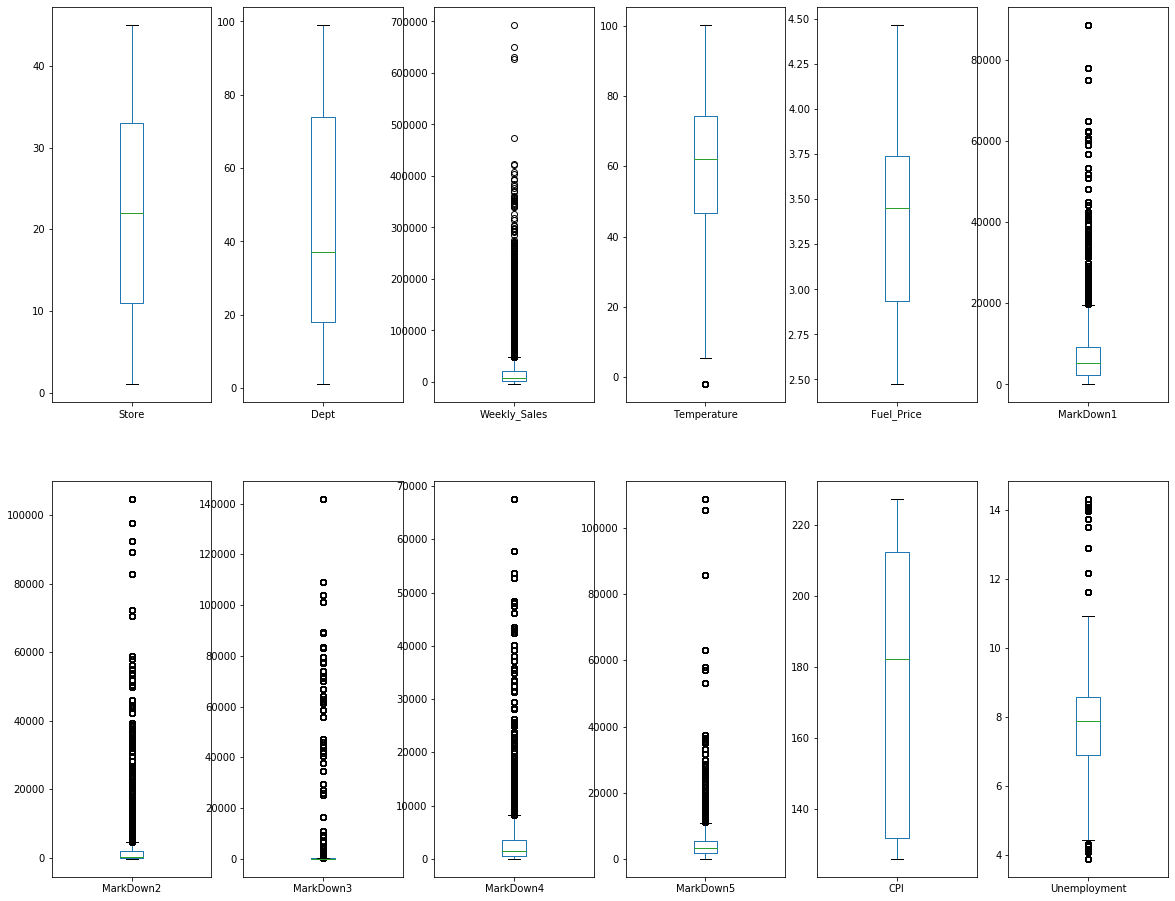

In [4]:
#Outlier Search: This helps you to get some insights about the outliers in the data.
Data.plot(kind='box',layout=(2,6),subplots=1,figsize=(20,16))
plt.show()

Exploratory Data Analysis

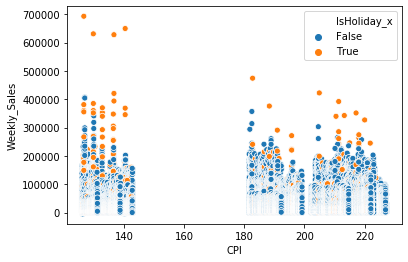

In [5]:
sns.scatterplot(Data['CPI'],Data['Weekly_Sales'],hue='IsHoliday_x',data=Data)

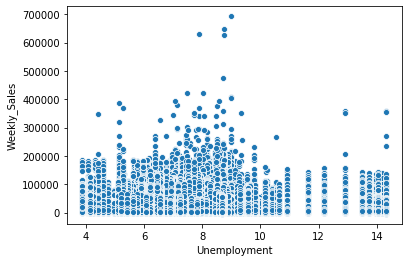

In [6]:
sns.scatterplot(Data['Unemployment'],Data['Weekly_Sales'])

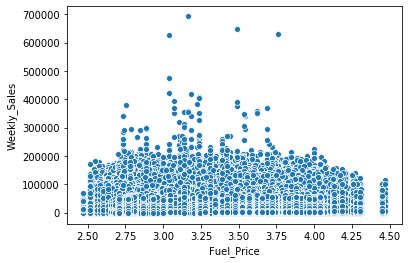

In [7]:
sns.scatterplot(Data['Fuel_Price'],Data['Weekly_Sales'])

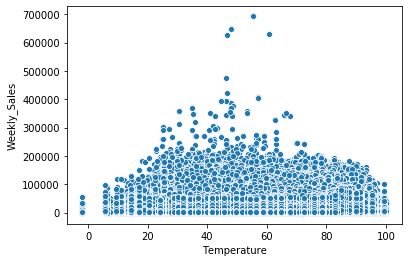

In [8]:
sns.scatterplot(Data['Temperature'],Data['Weekly_Sales'])

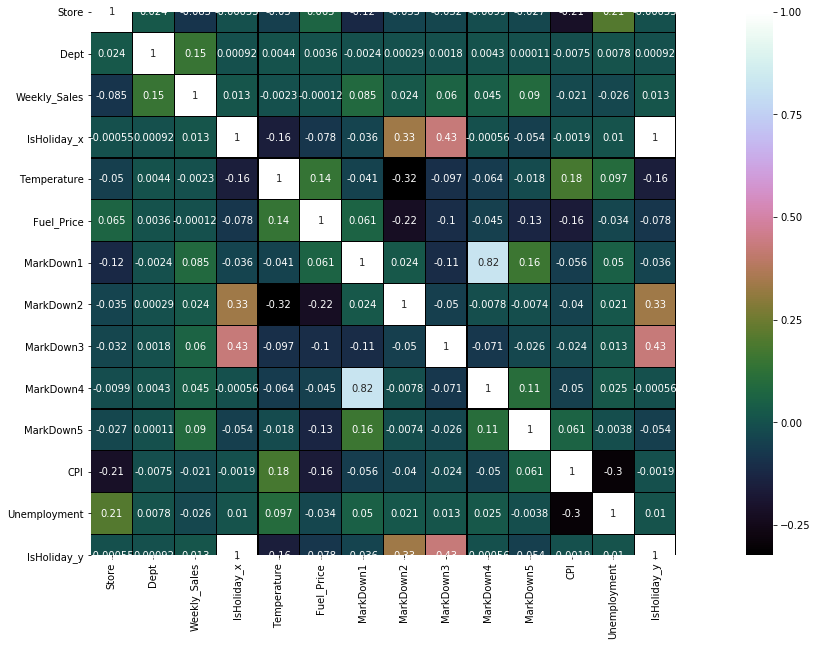

In [9]:
# Correlation
corr = Data.corr()
plt.figure(figsize=(25,10))
Heatmap = sns.heatmap(corr,annot=True,linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k')

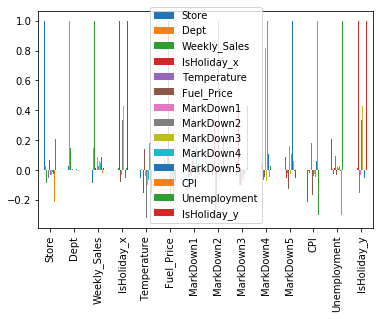

In [10]:
corr.plot.bar()

In [11]:
# Handle NaN (null) values.. Make them all 0
Data = Data.fillna(0)
Data[['Temperature']]=Data[['Temperature']].fillna(Data[['Temperature']].mean())
Data[['Temperature']]
Data[["Fuel_Price"]] = Data[["Fuel_Price"]].fillna(Data[["Fuel_Price"]].mean())
Data[["CPI"]] = Data[["CPI"]].fillna(Data[["CPI"]].mean())
Data[["Unemployment"]] = Data[["Unemployment"]].fillna(Data[["Unemployment"]].mean())
Data[["Fuel_Price"]]
Data[["CPI"]]
Data[["Unemployment"]]
Data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2/5/2010,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
1,1,2,2/5/2010,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
2,1,3,2/5/2010,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
3,1,4,2/5/2010,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
4,1,5,2/5/2010,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,10/26/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,10/26/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,10/26/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,10/26/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [12]:
# Descriptive Statistics
Data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


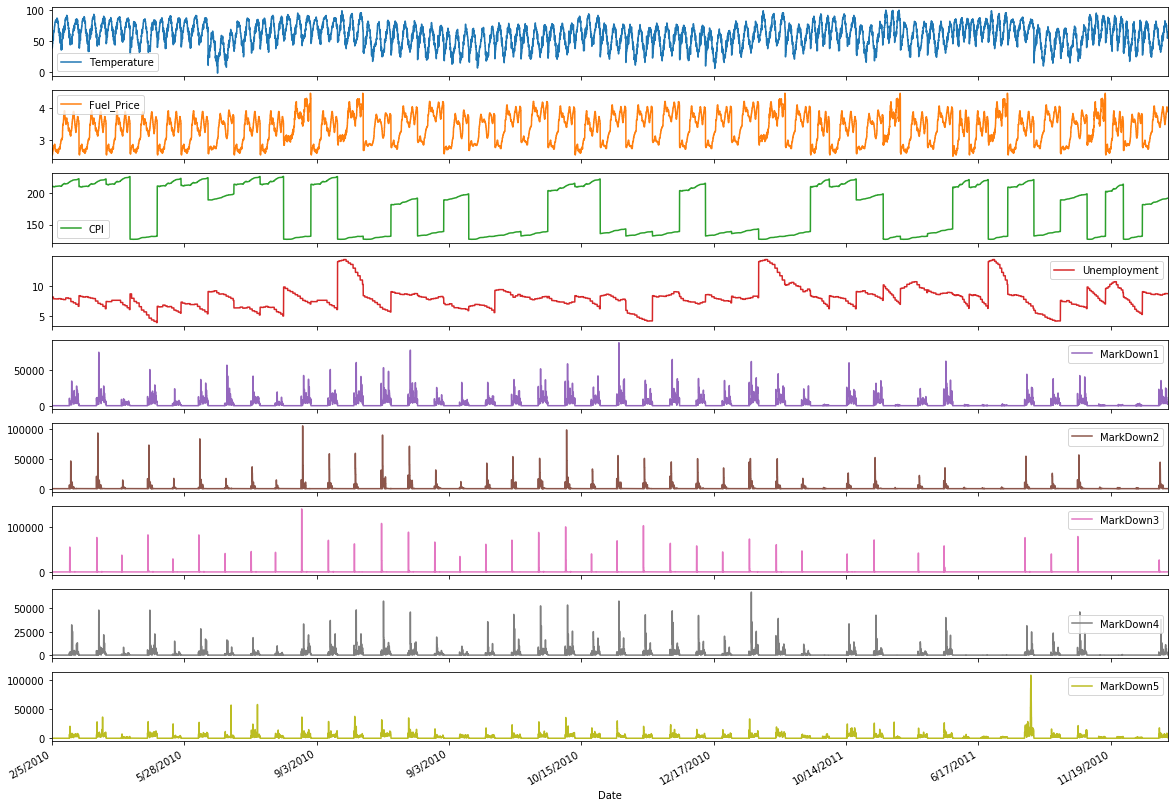

In [13]:
# Plots for the different features in the df: 
Data[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

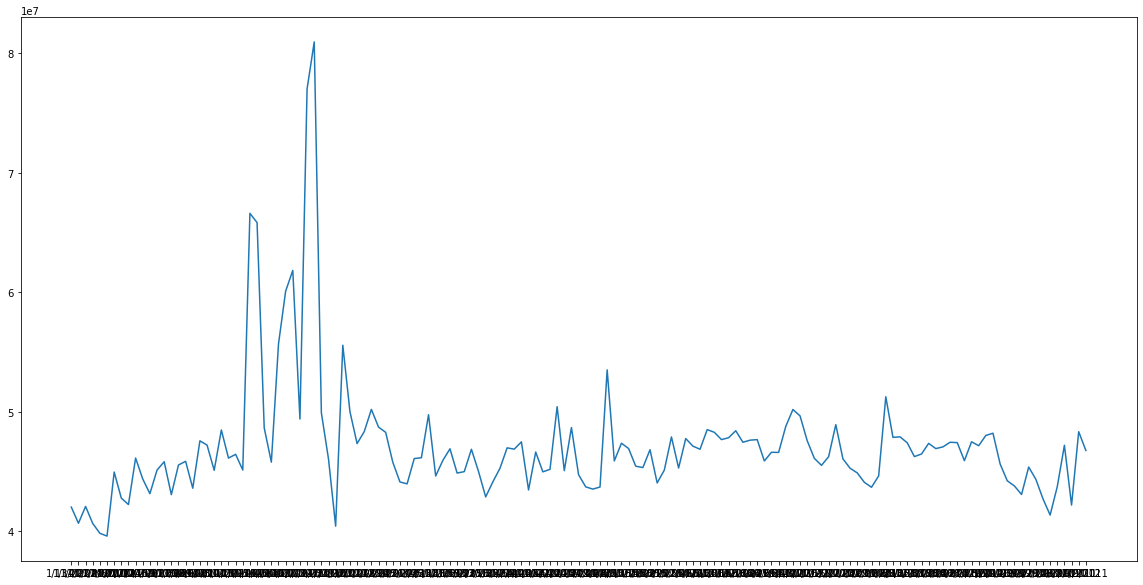

In [14]:
# Average weekly sales for the stores/departments during a week
df_average_sales_weekly = Data.groupby(by=["Date"], as_index = False)["Weekly_Sales"].sum()

df_average_sales = df_average_sales_weekly.sort_values("Weekly_Sales", ascending=False)

#print(df_average_sales[:10])

plt.figure(figsize=(20,10))
plt.plot(df_average_sales_weekly.Date, df_average_sales_weekly.Weekly_Sales)
plt.show

In [15]:
# Setup the dependent and the independent variables 
X = Data.drop(["Weekly_Sales","Date"], axis=1)
Y = Data['Weekly_Sales']

In [16]:
# Divide the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=5)

In [17]:
# Glance at the shape of the train and test sets

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(337256, 13)
(84314, 13)
(337256,)
(84314,)


Randomforest Regression

In [18]:
rf = RandomForestRegressor(n_estimators=100)
model_rf = rf.fit(X_train,Y_train)
y_rf_pred = model_rf.predict(X_test)
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test,y_rf_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test,y_rf_pred)))
print('R Squared Value of the Model : ', metrics.r2_score(Y_test,y_rf_pred))

Mean Absolute Error :  1892.7091620395192
Root Mean Squared Error :  5249.21340152487
R Squared Value of the Model :  0.9475477028437302


Linear Regression

In [19]:
# Train the model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)


Y_pred = regressor.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=['Predicted'])

In [20]:
from sklearn import metrics

print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test,y_rf_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test,y_rf_pred)))
print('R Squared Value of the Model : ', metrics.r2_score(Y_test,y_rf_pred))


Mean Absolute Error :  1892.7091620395192
Root Mean Squared Error :  5249.21340152487
R Squared Value of the Model :  0.9475477028437302
